# Travelers Case Competition 

## Team : Time Travelers


Adwaith Ajith Menon

Nandita Krishnan

Sai Jahnavi Gamalapati

# Business Problem

We are a group of Data Analysts working for Blue Buffalo Insurance, a property casualty insurance company based in downtown Hartford, Connecticut. Our business partner wants us to conduct a thorough analysis using historical policy and claim data. As the insurance market changes, the business partner is concerned about the company's retention rates. Customers are more willing to change the status quo than ever before. With current inflation and a volatile market, everyone is looking for ways to save a few dollars. Our team is in charge of analyzing and exploring historical data to determine which customers are "high value" to the company and how the company might be able to offer additional savings or incentives to keep these customers from switching insurance companies. For this analysis, we must incorporate the customers' driving telematics, which tracks the customers' driving habits. The goal here is to identify a subset of 'high value' customers and recommend retention strategies  to Blue Buffalo Insurance executives.




# Data Import

1. Importing Relevant Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

2. Reading the data

In [88]:
# Using gdown to download the datasets
!gdown 1YCjVdzSkIDW32sG3M27qYq5Sr94SREET
!gdown 1AOviUSkK0E43ikl2usDLycNmxrOpk6j3
!gdown 1CjoIA1peY8r0AOsos8qS2Di7H6F7hRi_
!gdown 1_ptWuqICWY73m3Ra8gG8nAUYEn6Ywcky
!gdown 1LgQnnW2hF81pMO2yxoxmFniu_23SQ7AH

Downloading...
From: https://drive.google.com/uc?id=1YCjVdzSkIDW32sG3M27qYq5Sr94SREET
To: /content/2022 Travelers BI&A LDP Case Competition Dataset 2_raw.csv
100% 35.4M/35.4M [00:00<00:00, 216MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AOviUSkK0E43ikl2usDLycNmxrOpk6j3
To: /content/2022 Travelers BI&A LDP Case Competition Dataset 1_raw.csv
100% 34.8M/34.8M [00:00<00:00, 224MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CjoIA1peY8r0AOsos8qS2Di7H6F7hRi_
To: /content/acc2.csv
100% 10.1M/10.1M [00:00<00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ptWuqICWY73m3Ra8gG8nAUYEn6Ywcky
To: /content/camera_ready_v1.xlsx
100% 21.3M/21.3M [00:00<00:00, 182MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LgQnnW2hF81pMO2yxoxmFniu_23SQ7AH
To: /content/cars.xlsx
100% 10.1k/10.1k [00:00<00:00, 9.76MB/s]


In [89]:
# Reading in both the files

p1 = pd.read_csv("/content/2022 Travelers BI&A LDP Case Competition Dataset 1_raw.csv")
p2 = pd.read_csv("/content/2022 Travelers BI&A LDP Case Competition Dataset 2_raw.csv")

In [90]:
# Merging the dataset

df = pd.concat([p1, p2])
df.head(5)

,Unnamed: 0,policy_nbr,age,gender,state_cd,state_nm,zip_cd,policy_effective_date,policy_start_date,auto_make,...,claim_amount,fraud_claims,credit_score,annual_premium,acceleration_x,acceleration_y,acceleration_z,acc_abs_cumm,acc_avg,second
0,0,451970,32,M,FL,Florida,34224,2022-01-25,2013-01-25,BMW,...,78900,0,743,758.59,"[-1.270458984375, 0.0237762451171875, 0.772204...","[-9.822131347656253, -9.301446533203128, -9.61...","[1.0703796386718751, 0.72076416015625, 0.41585...","[12.162969970703129, 10.045986938476565, 10.80...","[4.05432332356771, 3.3486623128255215, 3.60142...","[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, ..."
1,1,637342,21,M,NY,New York,11550,2022-11-06,2020-11-06,Suburu,...,0,0,708,1974.35,"[0.39264908, 0.40222588, 0.11492168, 0.4405331...","[9.519346, 9.433155000000001, 10.0748005, 9.55...","[-0.6799533, 0.08619126, 0.11492168, 0.5075707...","[10.59194838, 9.92157214, 10.30464386, 10.5057...","[3.53064946, 3.3071907133333336, 3.43488128666...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
2,2,621640,58,M,WA,Washington,98858,2022-06-18,1986-06-18,Honda,...,166700,0,726,710.02,"[-0.03591919, -0.096969604, -0.16520691, -0.31...","[10.13826, 8.808273, 9.943114999999999, 9.9778...","[-0.39982605, 1.256958, -0.1663971, -0.3483581...","[10.57400524, 10.162200603999999, 10.274719009...","[3.5246684133333335, 3.387400201333333, 3.4249...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
3,3,394545,41,F,VA,Virginia,22663,2022-10-16,2002-10-16,Honda,...,0,0,727,1412.47,"[0.10691833496093753, -1.0234252929687502, -0....","[-9.50810546875, -9.03497314453125, -9.0007293...","[-0.5537322998046875, 0.095703125, -0.05727233...","[10.168756103515625, 10.1541015625, 9.57599487...","[3.3895853678385417, 3.384700520833333, 3.1919...","[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, ..."
4,4,235969,25,M,AL,Alabama,35139,2022-08-15,2018-08-15,Dodge,...,0,0,725,1522.91,"[-0.18310547, -0.09397888, 0.06335449, 0.04541...","[9.617722, 9.597382000000001, 9.829483, 9.8456...","[-0.64767456, -0.1481781, -0.8109894, -0.65724...","[10.44850203, 9.839538980000002, 10.70382689, ...","[3.48283401, 3.2798463266666675, 3.56794229666...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."


# Data Cleaning 

In [91]:
# Printing the Shape of the DataFrame
df.shape

(1000, 23)

In [92]:
# Printing the Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   policy_nbr             1000 non-null   int64  
 2   age                    1000 non-null   int64  
 3   gender                 1000 non-null   object 
 4   state_cd               1000 non-null   object 
 5   state_nm               1000 non-null   object 
 6   zip_cd                 1000 non-null   int64  
 7   policy_effective_date  1000 non-null   object 
 8   policy_start_date      1000 non-null   object 
 9   auto_make              1000 non-null   object 
 10  auto_model             1000 non-null   object 
 11  auto_year              1000 non-null   int64  
 12  claims                 1000 non-null   int64  
 13  claim_amount           1000 non-null   int64  
 14  fraud_claims           1000 non-null   int64  
 15  credi

In [93]:
# Deleting first two columns as they don't add any value to the analysis

df.drop(['Unnamed: 0', 'policy_nbr'],axis = 1, inplace=True)

In [94]:
# Changing datatypes as required

df['policy_effective_date']=pd.to_datetime(df['policy_effective_date'])
df['policy_start_date']=pd.to_datetime(df['policy_start_date'])
df['fraud_claims'].astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    1000 non-null   int64         
 1   gender                 1000 non-null   object        
 2   state_cd               1000 non-null   object        
 3   state_nm               1000 non-null   object        
 4   zip_cd                 1000 non-null   int64         
 5   policy_effective_date  1000 non-null   datetime64[ns]
 6   policy_start_date      1000 non-null   datetime64[ns]
 7   auto_make              1000 non-null   object        
 8   auto_model             1000 non-null   object        
 9   auto_year              1000 non-null   int64         
 10  claims                 1000 non-null   int64         
 11  claim_amount           1000 non-null   int64         
 12  fraud_claims           1000 non-null   int64         
 13  cred

# Feature Engineering - Defining High Value Customers

1. Number of active years

active_years = policy_effective_date - policy_start_date

In [95]:
df['active_years']= df['policy_effective_date'].dt.year-df['policy_start_date'].dt.year
df['active_years']

0       9
1       2
2      36
3      20
4       4
       ..
495    33
496    22
497    11
498     8
499    24
Name: active_years, Length: 1000, dtype: int64

2. Factor to consider changes of premium over the years

Assumpton : 5% annual increase in premium

change_factor:

1 - 1

2 to 5 - 1.06

6 to 10 - 1.18

11 to 15 - 1.29

16 to 20 - 1.45

21 to 25 - 1.62

26 to 30 - 1.79

31 to 35 - 1.99

36 to 40 - 2.18

41 to 45 - 2.37

In [96]:
df.loc[df['active_years'] == 1, 'change_factor'] = 1
df.loc[(df['active_years'] >=2) & (df['active_years'] <=5), 'change_factor'] = 1.06
df.loc[(df['active_years'] >=6) & (df['active_years'] <=10), 'change_factor'] = 1.18
df.loc[(df['active_years'] >=11) & (df['active_years'] <=15), 'change_factor'] = 1.29
df.loc[(df['active_years'] >=16) & (df['active_years'] <=20), 'change_factor'] = 1.45
df.loc[(df['active_years'] >=21) & (df['active_years'] <=25), 'change_factor'] = 1.62
df.loc[(df['active_years'] >=26) & (df['active_years'] <=30), 'change_factor'] = 1.79
df.loc[(df['active_years'] >=31) & (df['active_years'] <=35), 'change_factor'] = 1.99
df.loc[(df['active_years'] >=36) & (df['active_years'] <=40), 'change_factor'] = 2.18
df.loc[(df['active_years'] >=41) & (df['active_years'] <=45), 'change_factor'] = 2.37
df[['change_factor']]

,change_factor
0,1.18
1,1.06
2,2.18
3,1.45
4,1.06
...,...
495,1.99
496,1.62
497,1.29
498,1.18


3. Total premium paid by the customer over the lifetime of their insurance policy

total_premium = (annual_premium * active_years) / change_factor

In [97]:
df['total_premium'] = (df['annual_premium'] * df['active_years']) / df['change_factor']
df[['total_premium']]

,total_premium
0,5785.855932
1,3725.188679
2,11725.100917
3,19482.344828
4,5746.830189
...,...
495,11456.804020
496,10029.148148
497,11595.790698
498,9651.728814


4. Net Revenue per Customer

net_revenue = total_premium - claim_amount

In [98]:
df['net_revenue'] = df['total_premium'] - df['claim_amount']
df[['net_revenue']]

,net_revenue
0,-73114.144068
1,3725.188679
2,-154974.899083
3,19482.344828
4,5746.830189
...,...
495,2556.804020
496,1129.148148
497,11595.790698
498,9651.728814


5. Total revenue by positive revenue generating customers

In [99]:
pos_revenue = df.loc[df['net_revenue'] > 0, 'net_revenue'].sum()
pos_revenue

2874668.3670505974

6. Customers contributing to 80% of the profit

https://tallyfy.com/high-value-customer/#:~:text=Those%20who%20contribute%2080%25%20of,value%20customers%20are%20important%20too.

Calculating 80% of net revenue by positive revenue generating customers

In [100]:
top_revenue = pos_revenue*0.8
top_revenue

2299734.693640478

7. High Value Customer 

In [101]:
df =df.sort_values(ascending=False, by = ['net_revenue'])
df

,age,gender,state_cd,state_nm,zip_cd,policy_effective_date,policy_start_date,auto_make,auto_model,auto_year,...,acceleration_x,acceleration_y,acceleration_z,acc_abs_cumm,acc_avg,second,active_years,change_factor,total_premium,net_revenue
14,52,F,MI,Michigan,49107,2022-09-19,1994-09-19,Honda,CRV,2001,...,"[-0.10534488, 0.15562311, -0.02633622, -0.0359...","[9.725247, 9.88925, 9.773131, 9.7324295, 9.770...","[0.9995792, 0.533907, 0.5542577, 0.62728083, 0...","[10.83017108, 10.57878011, 10.353724919999998,...","[3.6100570266666665, 3.5262600366666668, 3.451...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",28,1.79,23754.793296,2.375479e+04
244,62,M,NE,Nebraska,68944,2022-06-03,1992-06-03,Suburu,Legacy,1997,...,"[-0.38787252, -0.5818088, -0.32562137, -0.5889...","[9.8548355, 9.931452, 9.347249, 9.732727, 9.90...","[-1.010384, -0.8571504000000001, -1.0750294, -...","[11.25309202, 11.3704112, 10.74789977, 11.0184...","[3.7510306733333336, 3.7901370666666665, 3.582...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",30,1.79,23111.731844,2.311173e+04
412,48,F,OH,Ohio,44011,2022-01-02,1996-01-02,Ford,F150,2007,...,"[0.24523925781250006, 0.2609405517578125, 0.31...","[-9.714016723632813, -9.644482421875, -9.65166...","[-0.9754241943359376, -0.760540771484375, -0.7...","[10.934680175781251, 10.665963745117189, 10.69...","[3.644893391927084, 3.555321248372396, 3.56474...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",26,1.79,22558.558659,2.255856e+04
317,58,M,AL,Alabama,36051,2022-09-02,1995-09-02,Chevrolet,Malibu,2002,...,"[-0.4795623779296875, -0.0007476806640625, 0.9...","[-9.623846435546877, -10.87725830078125, -10.8...","[-0.6225189208984375, -0.3019134521484375, 0.4...","[10.725927734375002, 11.17991943359375, 12.217...","[3.5753092447916672, 3.7266398111979164, 4.072...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27,1.79,21607.240223,2.160724e+04
47,53,F,UT,Utah,84080,2022-04-16,1998-04-16,Suburu,Legacy,1998,...,"[-0.026947021, -0.26231384, 0.56144714, -0.105...","[9.908417, 9.967255, 12.49736, 9.771118, 9.928...","[-0.045959473, 0.4247589, 0.20899963, 0.169784...","[9.981323494, 10.65432774, 13.26780677, 10.046...","[3.327107831333333, 3.55144258, 4.422602256666...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",24,1.62,20456.296296,2.045630e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,54,F,CA,California,95494,2022-10-10,1989-10-10,Jeep,Grand Cherokee,2004,...,"[-0.239898681640625, -0.193206787109375, -0.09...","[-0.91534423828125, -1.0476837158203125, -1.07...","[-0.0819854736328125, -0.0381622314453125, -0....","[1.2372283935546875, 1.279052734375, 1.2326660...","[0.4124094645182292, 0.4263509114583333, 0.410...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",33,1.99,11471.065327,-2.519289e+05
475,53,F,SC,South Carolina,29014,2022-08-23,1996-08-23,Saab,93,1996,...,"[2.1867970000000003, -0.038154, 0.328609000000...","[9.416663, 9.853892, 10.26694, 9.085545, 9.704...","[-1.6789004, 0.5419898, -0.621688, -0.46078804...","[13.2823604, 10.4340358, 11.217237, 11.6412882...","[4.427453466666667, 3.4780119333333332, 3.7390...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",26,1.79,10067.519553,-1.408832e+06
241,51,F,CA,California,92347,2022-10-16,1999-10-16,Mercedes,E400,2002,...,"[-0.0192718505859375, 0.0655059814453125, 0.08...","[-1.003753662109375, -0.8802337646484375, -1.0...","[-0.0443572998046875, -0.139373779296875, -0.1...","[1.0673828125, 1.085113525390625, 1.2296752929...","[0.3557942708333333, 0.3617045084635417, 0.409...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",23,1.62,9798.851852,-1.435801e+06
348,32,F,TX,Texas,78257,2022-01-09,2014-01-09,Chevrolet,Silverado,2010,...,"[2.355, 1.685, -1.494, 1.13, 0.325, 0.38299999...","[9.04, 8.657, 9.5, 9.423, 9.328, 9.481, 8.9829...","[1.206, 0.172, 0.153, -0.861, -1.359, -0.919, ...","[12.600999999999999, 10.514000000000001, 11.14...","[4.200333333333333, 3.504666666666667, 3.71566..."

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 14 to 154
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    1000 non-null   int64         
 1   gender                 1000 non-null   object        
 2   state_cd               1000 non-null   object        
 3   state_nm               1000 non-null   object        
 4   zip_cd                 1000 non-null   int64         
 5   policy_effective_date  1000 non-null   datetime64[ns]
 6   policy_start_date      1000 non-null   datetime64[ns]
 7   auto_make              1000 non-null   object        
 8   auto_model             1000 non-null   object        
 9   auto_year              1000 non-null   int64         
 10  claims                 1000 non-null   int64         
 11  claim_amount           1000 non-null   int64         
 12  fraud_claims           1000 non-null   int64         
 13  cre

In [103]:
df['high_value'] = 0
cumm_sum = 0
i=0
while(cumm_sum < top_revenue):
    cumm_sum = cumm_sum + df.iloc[i,24] 
    df.iloc[i,25] = 1
    i+=1
df['high_value'].value_counts()

0    779
1    221
Name: high_value, dtype: int64

In [104]:
# Fraud Claims for High Value Customers

df1=df.loc[df['high_value']==0]
df1.loc[df1['fraud_claims'] > 0]

,age,gender,state_cd,state_nm,zip_cd,policy_effective_date,policy_start_date,auto_make,auto_model,auto_year,...,acceleration_y,acceleration_z,acc_abs_cumm,acc_avg,second,active_years,change_factor,total_premium,net_revenue,high_value
19,54,F,WI,Wisconsin,54020,2022-09-01,1998-09-01,Audi,A5,2015,...,"[-10.77677001953125, -10.159185791015622, -9.5...","[-0.6691741943359375, -0.61728515625, -0.31103...","[11.978442382812501, 11.241229248046873, 10.54...","[3.992814127604167, 3.747076416015624, 3.51499...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",24,1.62,10247.555556,1347.555556,0
125,46,F,MN,Minnesota,56431,2022-02-07,2000-02-07,Accura,MDX,2002,...,"[9.762360000000001, 10.978622, 10.801453, 9.65...","[-0.14613342, 0.39016724, 0.8881530999999999, ...","[9.92424049, 12.06927444, 12.2679905, 10.50346...","[3.3080801633333334, 4.02309148, 4.08933016666...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",22,1.62,9623.641975,723.641975,0
15,55,M,NH,New Hampshire,3266,2022-08-18,2004-08-18,Mercedes,E400,2002,...,"[-9.719699096679687, -9.767999267578128, -9.71...","[-0.286810302734375, -0.4305145263671875, -0.4...","[10.433883666992188, 10.65639343261719, 10.614...","[3.477961222330729, 3.5521311442057297, 3.5380...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",18,1.45,9185.958621,285.958621,0
499,56,M,OK,Oklahoma,73005,2022-03-25,2001-03-25,Volkswagen,Passat,2012,...,"[9.763555, 9.685742999999999, 9.718064, 9.5732...","[-0.107739076, -0.4189853, 0.1448492, -0.07062...","[10.605116876, 11.303026299999997, 10.7068693,...","[3.5350389586666666, 3.7676754333333324, 3.568...","[0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 8.0, 9.0, 11.0,...",21,1.62,8989.166667,89.166667,0
422,43,F,MA,Massachusetts,2646,2022-03-07,2007-03-07,Dodge,RAM,2005,...,"[9.689333999999999, 9.900024, 9.957485, 9.3685...","[0.46686932, 2.2098482, -0.062249242999999996,...","[11.11867242, 13.484144, 11.173739443, 10.7092...","[3.70622414, 4.494714666666667, 3.724579814333...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",15,1.29,8211.744186,-688.255814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,50,F,CA,California,90020,2022-04-21,1995-04-21,Mercedes,E400,2014,...,"[-1.0144500732421875, -0.9827880859375, -1.004...","[-0.0770416259765625, -0.0771331787109375, -0....","[1.1065521240234375, 1.0745849609375, 1.100921...","[0.3688507080078125, 0.3581949869791667, 0.366...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27,1.79,10422.754190,-182977.245810,0
422,46,F,TX,Texas,76670,2022-07-06,1994-07-06,Audi,A5,2005,...,"[8.520905, 8.584351, 8.774078, 8.864471, 9.020...","[2.0165863, 1.4120483, 0.4848938, 0.71533203, ...","[11.4454045, 10.08250465, 9.58167993, 9.589477...","[3.8151348333333335, 3.3608348833333337, 3.193...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",28,1.79,10798.614525,-225901.385475,0
178,54,M,GA,Georgia,31749,2022-06-18,1988-06-18,Jeep,Grand Cherokee,2010,...,"[7.8509827, 8.565842, 8.680695, 8.759949, 9.47...","[1.1517944, 1.3500976999999998, 1.3387299, -0....","[9.24078369, 10.020843874999999, 10.52829026, ...","[3.08026123, 3.3402812916666664, 3.50943008666...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",34,1.99,12533.869347,-233066.130653,0
271,61,M,CA,California,90032,2022-07-23,1987-07-23,Suburu,Forrestor,2011,...,"[-1.0367431640625, -0.96197509765625, -1.00207...","[-0.047271728515625, -0.0946807861328125, -0.0...","[1.102630615234375, 1.0922698974609375, 1.1233...","[0.3675435384114583, 0.3640899658203125, 0.374...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",35,1.99,12509.070352,-250890.929648,0


# Visualization

In [105]:
#Age

<AxesSubplot:xlabel='high_value', ylabel='age'>

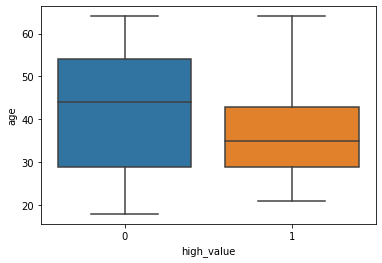

In [106]:
sns.boxplot(x="high_value", y="age", data=df)

In [107]:
df.groupby(['high_value'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
high_value,,,,,,,,
0,779.0,41.652118,13.999299,18.0,29.0,44.0,54.0,64.0
1,221.0,36.389140,9.576613,21.0,29.0,35.0,43.0,64.0


<AxesSubplot:xlabel='high_value', ylabel='count'>

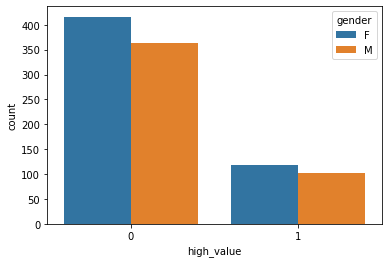

In [108]:
sns.countplot(hue='gender', x='high_value', data=df)

In [109]:
#ratio of female to male for high value customers slightly higher, but not enough to be mentioned

In [110]:
pd.crosstab(df.gender, df.high_value)

high_value,0,1
gender,,
F,416,119
M,363,102


<AxesSubplot:xlabel='high_value', ylabel='credit_score'>

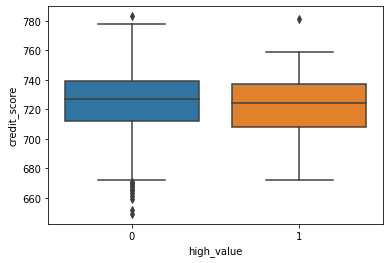

In [111]:
#ratio is same
df.loc[df['credit_score']==0, 'high_value'].value_counts()

#ignore 0 credit score columns
sns.boxplot(x="high_value", y="credit_score", data=df.loc[df['credit_score'] !=0])

In [112]:
df.loc[df['credit_score'] !=0].groupby(['high_value'])['credit_score'].describe()

,count,mean,std,min,25%,50%,75%,max
high_value,,,,,,,,
0,717.0,724.283124,22.315461,649.0,712.0,727.0,739.0,783.0
1,209.0,722.521531,18.682848,672.0,708.0,724.0,737.0,781.0


In [113]:
pd.crosstab(df.fraud_claims, df.high_value)

high_value,0,1
fraud_claims,,
0,704,221
1,70,0
2,5,0


<AxesSubplot:xlabel='high_value', ylabel='count'>

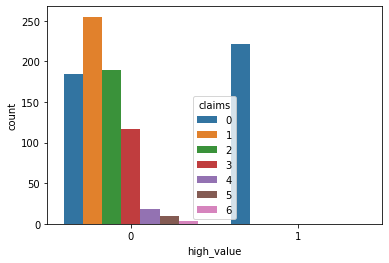

In [114]:
sns.countplot(hue='claims', x='high_value', data=df)

# Telematics

In [115]:
acc = pd.read_csv("/content/acc2.csv", header=None)
acc[acc=='null']=0
jolt = np.zeros((acc.shape[0], acc.shape[1]-1))
time = np.arange(1,acc.shape[1]-1)

print(acc.shape)
for j in range(acc.shape[0]):
  sample = acc.iloc[j]
  x = np.diff(sample)
  jolt[j,:]=x

positive_peaks = []
negative_peaks = []
threshold = 2 

for i in range(acc.shape[0]):

    positive_peakind = signal.find_peaks((jolt[i,:]), height=threshold)
    #negative_peakind = signal.find_peaks(-1*(jolt[i,:]))
    #print(len(positive_peakind[0]))
    negative = [j * -1 for j in jolt[i,:]]
   
    negative_peakind =  signal.find_peaks(negative, height=threshold)
    positive_peaks.append(len(positive_peakind[0]))
    negative_peaks.append(len(negative_peakind[0]))

df['negative_peaks'] = negative_peaks
df['positive_peaks'] = positive_peaks
df

(1000, 1800)


,age,gender,state_cd,state_nm,zip_cd,policy_effective_date,policy_start_date,auto_make,auto_model,auto_year,...,acc_abs_cumm,acc_avg,second,active_years,change_factor,total_premium,net_revenue,high_value,negative_peaks,positive_peaks
14,52,F,MI,Michigan,49107,2022-09-19,1994-09-19,Honda,CRV,2001,...,"[10.83017108, 10.57878011, 10.353724919999998,...","[3.6100570266666665, 3.5262600366666668, 3.451...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",28,1.79,23754.793296,2.375479e+04,1,0,1
244,62,M,NE,Nebraska,68944,2022-06-03,1992-06-03,Suburu,Legacy,1997,...,"[11.25309202, 11.3704112, 10.74789977, 11.0184...","[3.7510306733333336, 3.7901370666666665, 3.582...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",30,1.79,23111.731844,2.311173e+04,1,3,2
412,48,F,OH,Ohio,44011,2022-01-02,1996-01-02,Ford,F150,2007,...,"[10.934680175781251, 10.665963745117189, 10.69...","[3.644893391927084, 3.555321248372396, 3.56474...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",26,1.79,22558.558659,2.255856e+04,1,1,0
317,58,M,AL,Alabama,36051,2022-09-02,1995-09-02,Chevrolet,Malibu,2002,...,"[10.725927734375002, 11.17991943359375, 12.217...","[3.5753092447916672, 3.7266398111979164, 4.072...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27,1.79,21607.240223,2.160724e+04,1,0,1
47,53,F,UT,Utah,84080,2022-04-16,1998-04-16,Suburu,Legacy,1998,...,"[9.981323494, 10.65432774, 13.26780677, 10.046...","[3.327107831333333, 3.55144258, 4.422602256666...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",24,1.62,20456.296296,2.045630e+04,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,54,F,CA,California,95494,2022-10-10,1989-10-10,Jeep,Grand Cherokee,2004,...,"[1.2372283935546875, 1.279052734375, 1.2326660...","[0.4124094645182292, 0.4263509114583333, 0.410...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",33,1.99,11471.065327,-2.519289e+05,0,0,0
475,53,F,SC,South Carolina,29014,2022-08-23,1996-08-23,Saab,93,1996,...,"[13.2823604, 10.4340358, 11.217237, 11.6412882...","[4.427453466666667, 3.4780119333333332, 3.7390...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",26,1.79,10067.519553,-1.408832e+06,0,1,1
241,51,F,CA,California,92347,2022-10-16,1999-10-16,Mercedes,E400,2002,...,"[1.0673828125, 1.085113525390625, 1.2296752929...","[0.3557942708333333, 0.3617045084635417, 0.409...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",23,1.62,9798.851852,-1.435801e+06,0,1,0
348,32,F,TX,Texas,78257,2022-01-09,2014-01-09,Chevrolet,Silverado,2010,...,"[12.600999999999999, 10.514000000000001, 11.14...","[4.200333333333333, 3.504666666666667, 3.71566...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",8,1.18,5227.457627,-1.492573e+06,0,0,0


In [116]:
df['positive_peaks'].describe()

count    1000.000000
mean        1.188000
std         6.016548
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       134.000000
Name: positive_peaks, dtype: float64

In [117]:
df['positive_peaks'].value_counts()


0      535
1      241
2      113
3       61
4       24
5       15
7        3
6        3
8        1
134      1
49       1
16       1
121      1
Name: positive_peaks, dtype: int64

In [118]:
car = pd.read_excel("/content/cars.xlsx")
dataset = pd.read_excel("/content/camera_ready_v1.xlsx")
car_type = [] 

print(df.shape)
for i in range(1000):
  for j in range(39):
    if((dataset['auto_make'].iloc[i]==car['Make'].iloc[j]) & (dataset['auto_model'].iloc[i]==car['Model'].iloc[j])):
      car_type.append(car['Type'].iloc[j])
    
df['Car Type'] = car_type 



(1000, 28)


In [119]:
# Saving the DataFrame as a CSV file
df.to_csv('Final_Data.csv')